In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Series 基础

In [2]:
obj = Series([3, 6, 9, 12])

In [3]:
# Series will add index to the list
obj

0     3
1     6
2     9
3    12
dtype: int64

In [4]:
# to get the vaule, must use .values
obj.values
# the values is a numpy array

array([ 3,  6,  9, 12], dtype=int64)

In [5]:
# can also get the index 
obj.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [6]:
# 构造Series的时候可以指定index
ww2_cas = Series([8700000,4300000,3000000,2100000,400000],index=['USSR','Germany','China','Japan','USA'])

ww2_cas

USSR       8700000
Germany    4300000
China      3000000
Japan      2100000
USA         400000
dtype: int64

In [7]:
# 有了index的好处之一就是可以像字典一样通过key来取值
# 这里的key就是index
ww2_cas['China']

3000000

In [8]:
# 可以直接做numpy 中的各种array操作
# 例如filter
ww2_cas[ww2_cas > 4000000]

USSR       8700000
Germany    4300000
dtype: int64

In [9]:
# in 操作
# 需要注意这里的in操作只会判断数值是否在index里面，而不是在value里面
# 这一点也是和字典很像

'USSR' in ww2_cas

True

In [13]:
400000 in ww2_cas

False

In [14]:
# 如果要对value进行in判断的话，可以这样：
400000 in ww2_cas.values

True

In [15]:
# 由于数据结构和字典很像，两个数据结构中的转换也很简单：
ww2_dict = ww2_cas.to_dict()
ww2_dict

{'China': 3000000,
 'Germany': 4300000,
 'Japan': 2100000,
 'USA': 400000,
 'USSR': 8700000}

In [16]:
#Can convert back into a Series
WW2_Series = Series(ww2_dict)
WW2_Series

China      3000000
Germany    4300000
Japan      2100000
USA         400000
USSR       8700000
dtype: int64

In [17]:
ww2_dict = {
 'Germany': 4300000,
 'Japan': 2100000,
 'USA': 400000,
 'USSR': 8700000,
'China': 3000000,}

In [18]:
# 当使用字典转变为series的时候，index会自动排序
WW2_Series = Series(ww2_dict)
WW2_Series

China      3000000
Germany    4300000
Japan      2100000
USA         400000
USSR       8700000
dtype: int64

In [19]:
# 指定一个不存在的index，自动填充NaN值
countries = ['China','Germany','Japan','USA','USSR','Argentina']
#Lets redefine a Series
obj2 = Series(ww2_dict,index=countries)
obj2

China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Argentina        NaN
dtype: float64

In [20]:
# NaN 是 pandas中 missing data的意思
# 有专门的接口判断某值是否为Null

pd.isnull(obj2)

China        False
Germany      False
Japan        False
USA          False
USSR         False
Argentina     True
dtype: bool

In [21]:
pd.notnull(obj2)

China         True
Germany       True
Japan         True
USA           True
USSR          True
Argentina    False
dtype: bool

In [22]:
# 两个 series的相互操作，会自动选择index作为key
WW2_Series

China      3000000
Germany    4300000
Japan      2100000
USA         400000
USSR       8700000
dtype: int64

In [23]:
obj2

China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Argentina        NaN
dtype: float64

In [24]:
WW2_Series + obj2

Argentina         NaN
China         6000000
Germany       8600000
Japan         4200000
USA            800000
USSR         17400000
dtype: float64

In [25]:
# 我们可以分别给series和index取名字
# 但是不知道具体的用处有哪些
obj2.name = "World War 2 Casualties"
#We can also name index
obj2.index.name = 'Countries'
obj2

Countries
China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Argentina        NaN
Name: World War 2 Casualties, dtype: float64

# DataFrames 基础

In [28]:
# 可以直接拷贝一个表格的数据， 然后运行下面的方法。。。
nfl_frame = pd.read_clipboard()

In [29]:
nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North
5,6,San Francisco 49ers,545,444,14,0.550,1950,1003,NFC West
6,7,New England Patriots,478,395,9,0.547,1960,882,AFC East
7,8,New York Giants,691,581,33,0.542,1925,1305,NFC East
8,9,Denver Broncos,464,400,10,0.537,1960,874,AFC West
9,10,Minnesota Vikings,457,401,10,0.532,1961,868,NFC North


In [30]:
# We can grab the oclumn names with .columns
nfl_frame.columns

Index([u'Rank', u'Team', u'Won', u'Lost', u'Tied*', u'Pct.', u'First Season',
       u'Total Games', u'Conference'],
      dtype='object')

In [32]:
# 取单列的数据
nfl_frame.Team

0           Dallas Cowboys
1            Chicago Bears
2        Green Bay Packers
3           Miami Dolphins
4         Baltimore Ravens
5      San Francisco 49ers
6     New England Patriots
7          New York Giants
8           Denver Broncos
9        Minnesota Vikings
10         Oakland Raiders
11      Indianapolis Colts
Name: Team, dtype: object

In [36]:
# 也可以这样取
nfl_frame['Total Games']

0      894
1     1357
2     1339
3      792
4      326
5     1003
6      882
7     1305
8      874
9      868
10     879
11     963
Name: Total Games, dtype: int64

In [34]:
# 取多列的数据
nfl_frame[['Team','First Season','Total Games']]

,Team,First Season,Total Games
0,Dallas Cowboys,1960,894
1,Chicago Bears,1920,1357
2,Green Bay Packers,1921,1339
3,Miami Dolphins,1966,792
4,Baltimore Ravens,1996,326
5,San Francisco 49ers,1950,1003
6,New England Patriots,1960,882
7,New York Giants,1925,1305
8,Denver Broncos,1960,874
9,Minnesota Vikings,1961,868


In [31]:
#Lets see some specific data columns
# 这种方法会产生一个新的DF
DataFrame(nfl_frame,columns=['Team','First Season','Total Games'])

,Team,First Season,Total Games
0,Dallas Cowboys,1960,894
1,Chicago Bears,1920,1357
2,Green Bay Packers,1921,1339
3,Miami Dolphins,1966,792
4,Baltimore Ravens,1996,326
5,San Francisco 49ers,1950,1003
6,New England Patriots,1960,882
7,New York Giants,1925,1305
8,Denver Broncos,1960,874
9,Minnesota Vikings,1961,868


In [35]:
#What happens if we ask for a column that doesn't exist?
DataFrame(nfl_frame,columns=['Team','First Season','Total Games','Stadium'])

,Team,First Season,Total Games,Stadium
0,Dallas Cowboys,1960,894,NaN
1,Chicago Bears,1920,1357,NaN
2,Green Bay Packers,1921,1339,NaN
3,Miami Dolphins,1966,792,NaN
4,Baltimore Ravens,1996,326,NaN
5,San Francisco 49ers,1950,1003,NaN
6,New England Patriots,1960,882,NaN
7,New York Giants,1925,1305,NaN
8,Denver Broncos,1960,874,NaN
9,Minnesota Vikings,1961,868,NaN


In [37]:
# 取单行
nfl_frame.ix[3]

Rank                         4
Team            Miami Dolphins
Won                        443
Lost                       345
Tied*                        4
Pct.                     0.562
First Season              1966
Total Games                792
Conference            AFC East
Name: 3, dtype: object

In [38]:
#We can also assign value sto entire columns
nfl_frame['Stadium']="Levi's Stadium" #Careful with the ' here

In [39]:
nfl_frame.head()

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference,Stadium
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East,Levi's Stadium
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North,Levi's Stadium
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North,Levi's Stadium
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East,Levi's Stadium
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North,Levi's Stadium


In [42]:
#Putting numbers for stadiums
nfl_frame["Stadium"] = np.arange(12)

#Show
nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference,Stadium
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East,0
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North,1
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North,2
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East,3
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North,4
5,6,San Francisco 49ers,545,444,14,0.550,1950,1003,NFC West,5
6,7,New England Patriots,478,395,9,0.547,1960,882,AFC East,6
7,8,New York Giants,691,581,33,0.542,1925,1305,NFC East,7
8,9,Denver Broncos,464,400,10,0.537,1960,874,AFC West,8
9,10,Minnesota Vikings,457,401,10,0.532,1961,868,NFC North,9


In [43]:
#Adding a Series to a DataFrame
stadiums = Series(["Levi's Stadium","AT&T Stadium"],index=[4,0])
stadiums

4    Levi's Stadium
0      AT&T Stadium
dtype: object

In [44]:
# 当把Series加到DF里的时候，会对应index进行加
#Now input into the nfl DataFrame
nfl_frame['Stadium']=stadiums

#Show
nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference,Stadium
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East,AT&T Stadium
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North,NaN
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North,NaN
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East,NaN
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North,Levi's Stadium
5,6,San Francisco 49ers,545,444,14,0.550,1950,1003,NFC West,NaN
6,7,New England Patriots,478,395,9,0.547,1960,882,AFC East,NaN
7,8,New York Giants,691,581,33,0.542,1925,1305,NFC East,NaN
8,9,Denver Broncos,464,400,10,0.537,1960,874,AFC West,NaN
9,10,Minnesota Vikings,457,401,10,0.532,1961,868,NFC North,NaN


In [45]:
# 删除一个列
#We can also delete columns
del nfl_frame['Stadium']

nfl_frame

,Rank,Team,Won,Lost,Tied*,Pct.,First Season,Total Games,Conference
0,1,Dallas Cowboys,511,378,6,0.574,1960,894,NFC East
1,2,Chicago Bears,752,563,42,0.570,1920,1357,NFC North
2,3,Green Bay Packers,741,561,37,0.567,1921,1339,NFC North
3,4,Miami Dolphins,443,345,4,0.562,1966,792,AFC East
4,5,Baltimore Ravens,182,143,1,0.560,1996,326,AFC North
5,6,San Francisco 49ers,545,444,14,0.550,1950,1003,NFC West
6,7,New England Patriots,478,395,9,0.547,1960,882,AFC East
7,8,New York Giants,691,581,33,0.542,1925,1305,NFC East
8,9,Denver Broncos,464,400,10,0.537,1960,874,AFC West
9,10,Minnesota Vikings,457,401,10,0.532,1961,868,NFC North


In [46]:
#DataFrames can be constructed many ways. Another way is from a dictionary of equal length lists
# 注意是等长的list
# key会变成column的名字
# 不像Series中会将其变成index
data = {'City':['SF','LA','NYC'],
        'Population':[837000,3880000,8400000]}

city_frame = DataFrame(data)

#Show
city_frame

,City,Population
0,SF,837000
1,LA,3880000
2,NYC,8400000


In [47]:
# 官方关于DataFrame的文档
website = 'http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html'


# index object

In [48]:
#Let's learn/review about Index Objects
my_ser = Series([1,2,3,4],index=['A','B','C','D'])

#Get the index
my_index = my_ser.index

In [49]:
my_index

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [50]:
# 注意这里是Index Object
# 和list一样可以区间取值
#Can grab index ranges
my_index[2:]

Index([u'C', u'D'], dtype='object')

In [51]:
# 但是！ index的特定是不可以改变他的值~
#What happens if we try to change an index value?
my_index[0] = 'Z'

TypeError: Indexes does not support mutable operations

In [52]:
#Indexes are immutable!

# Reindexing

In [53]:
ser1 = Series([1,2,3,4],index=['A','B','C','D'])
ser1

A    1
B    2
C    3
D    4
dtype: int64

In [54]:
#Call reindex to rearrange the data to a new index
ser2 = ser1.reindex(['A','B','C','D','E','F'])

ser2

# reindex 之后多出来的会用NaN填充

A     1
B     2
C     3
D     4
E   NaN
F   NaN
dtype: float64

In [55]:
# 当然可以指定填充物
ser2.reindex(['A','B','C','D','E','F','G'],fill_value=0)

A     1
B     2
C     3
D     4
E   NaN
F   NaN
G     0
dtype: float64

In [56]:
#Using a particular method for filling values
ser3 = Series(['USA','Mexico','Canada'],index=[0,5,10])

#Show
ser3

0        USA
5     Mexico
10    Canada
dtype: object

In [57]:
#Can use a forward fill 去填充
ser3.reindex(range(15),method='ffill')

0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Canada
11    Canada
12    Canada
13    Canada
14    Canada
dtype: object

In [58]:
#Reindexing rows, columns or both

#Lets make a datafram ewith some random values
dframe = DataFrame(np.random.randn(25).reshape((5,5)),index=['A','B','D','E','F'],columns=['col1','col2','col3','col4','col5'])

#Show
dframe

,col1,col2,col3,col4,col5
A,0.519198,-0.167774,-0.410447,-0.562567,-0.465879
B,-2.355173,-0.049336,1.263391,-1.200909,-2.008524
D,0.921488,-0.695005,-0.892167,-0.097087,-1.853306
E,-2.186199,-0.956981,-1.059911,0.213244,-1.001633
F,1.072603,-0.467804,2.031873,1.361518,-0.254492


In [59]:
#Notice we forgot 'C' , lets reindex it into dframe
dframe2 = dframe.reindex(['A','B','C','D','E','F'])
#Can also explicitly reindex columns
new_columns = ['col1','col2','col3','col4','col5','col6']

dframe2.reindex(columns=new_columns)

,col1,col2,col3,col4,col5,col6
A,0.519198,-0.167774,-0.410447,-0.562567,-0.465879,NaN
B,-2.355173,-0.049336,1.263391,-1.200909,-2.008524,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,0.921488,-0.695005,-0.892167,-0.097087,-1.853306,NaN
E,-2.186199,-0.956981,-1.059911,0.213244,-1.001633,NaN
F,1.072603,-0.467804,2.031873,1.361518,-0.254492,NaN


In [63]:
dframe2._is_view

# 注意这是一个view

True

In [64]:
#Reindex quickly using the label-indexing with ix 

#Show original
dframe

,col1,col2,col3,col4,col5
A,0.519198,-0.167774,-0.410447,-0.562567,-0.465879
B,-2.355173,-0.049336,1.263391,-1.200909,-2.008524
D,0.921488,-0.695005,-0.892167,-0.097087,-1.853306
E,-2.186199,-0.956981,-1.059911,0.213244,-1.001633
F,1.072603,-0.467804,2.031873,1.361518,-0.254492


In [65]:
dframe.ix[['A','B','C','D','E','F'],new_columns]

,col1,col2,col3,col4,col5,col6
A,0.519198,-0.167774,-0.410447,-0.562567,-0.465879,NaN
B,-2.355173,-0.049336,1.263391,-1.200909,-2.008524,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,0.921488,-0.695005,-0.892167,-0.097087,-1.853306,NaN
E,-2.186199,-0.956981,-1.059911,0.213244,-1.001633,NaN
F,1.072603,-0.467804,2.031873,1.361518,-0.254492,NaN


# dropping entries

In [66]:
#Create a new series to play with
ser1 = Series(np.arange(3),index=['a','b','c'])

#Show
ser1

a    0
b    1
c    2
dtype: int32

In [67]:
#Now let's drop an index
ser1.drop('b')

a    0
c    2
dtype: int32

In [68]:
# drop可以drop row或者column， 只要指定aixs就好
#With a DataFrame we can drop values from either axis
dframe1 = DataFrame(np.arange(9).reshape((3,3)),index=['SF','LA','NY'],columns=['pop','size','year'])

#Show (remember just random values)
dframe1

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [69]:
#Now dropping a row
dframe1.drop('LA')

,pop,size,year
SF,0,1,2
NY,6,7,8


In [70]:
#Or we could drop a column

#Need to specify that axis is 1, not 0
dframe1.drop('year',axis=1)

,pop,size
SF,0,1
LA,3,4
NY,6,7


In [71]:
# 你会发现原始DF并没有改变，因为刚的操作放回的都是一个view
# 如果需要改变原Df， 需要指定inplace=True
dframe1

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [72]:
dframe1.drop('year',axis=1, inplace=True)
dframe1

,pop,size
SF,0,1
LA,3,4
NY,6,7


# Selecting Entries

In [73]:
#Lets try some Series indexing
ser1 = Series(np.arange(3),index=['A','B','C'])

#multiply all values by 2, to avoid confusion in future
ser1 = 2*ser1

#Show
ser1 

A    0
B    2
C    4
dtype: int32

In [74]:
#Can grab entry by index name
# 注意和df的不同，df中的这个操作是抓取一列
ser1['B']

2

In [75]:
#Or grab by index 
ser1[1]

2

In [76]:
#Can also grab by index range
ser1[0:3]

A    0
B    2
C    4
dtype: int32

In [77]:
#Or grab range by range of index values
ser1[['A','B','C']]

A    0
B    2
C    4
dtype: int32

In [78]:
#Or grab by logic
ser1[ser1>3]

C    4
dtype: int32

In [79]:
#Can also ser using these methods
ser1[ser1>3] = 10

#Show
ser1

A     0
B     2
C    10
dtype: int32

In [80]:
#Now let's see sleection in a DataFrame

dframe = DataFrame(np.arange(25).reshape((5,5)),index=['NYC','LA','SF','DC','Chi'],columns=['A','B','C','D','E'])

#Show
dframe

,A,B,C,D,E
NYC,0,1,2,3,4
LA,5,6,7,8,9
SF,10,11,12,13,14
DC,15,16,17,18,19
Chi,20,21,22,23,24


In [81]:
#Select by column name
dframe['B']

NYC     1
LA      6
SF     11
DC     16
Chi    21
Name: B, dtype: int32

In [82]:
#Select by multiple columns
dframe[['B','E']]

,B,E
NYC,1,4
LA,6,9
SF,11,14
DC,16,19
Chi,21,24


In [83]:
#Can also use boolean
dframe[dframe['C']>8]

,A,B,C,D,E
SF,10,11,12,13,14
DC,15,16,17,18,19
Chi,20,21,22,23,24


In [84]:
#Can also just shoe a boolean DataFrame
dframe> 10

,A,B,C,D,E
NYC,False,False,False,False,False
LA,False,False,False,False,False
SF,False,True,True,True,True
DC,True,True,True,True,True
Chi,True,True,True,True,True


In [85]:
#Can alos use ix as previously discussed to label-index
# 通过index选取
dframe.ix['LA']

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int32

In [86]:
#Another example
dframe.ix[1]

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int32

# Data Alignment

In [87]:
#Lets start by making two Series

ser1 = Series([0,1,2],index=['A','B','C'])

#Show
ser1

A    0
B    1
C    2
dtype: int64

In [88]:
#Now second Series 2
ser2 = Series([3,4,5,6],index=['A','B','C','D'])

#Show 
ser2 

A    3
B    4
C    5
D    6
dtype: int64

In [89]:
#So what happens when we add these together
ser1 + ser2

# 多出来的将会是NaN代替

A     3
B     5
C     7
D   NaN
dtype: float64

In [90]:
# Now let's try it with DataFrames!
dframe1 = DataFrame(np.arange(4).reshape(2,2),columns=list('AB'),index=['NYC','LA'])

#Show
dframe1

,A,B
NYC,0,1
LA,2,3


In [91]:
#Second DataFrame
dframe2 = DataFrame(np.arange(9).reshape(3,3),columns=list('ADC'),index=['NYC','SF','LA'])

#Show
dframe2

,A,D,C
NYC,0,1,2
SF,3,4,5
LA,6,7,8


In [92]:
#What happens when we add them together?

dframe1 + dframe2

# 没相应的index或者column的时候，就等于 数字+NaN = NaN

,A,B,C,D
LA,8,NaN,NaN,NaN
NYC,0,NaN,NaN,NaN
SF,NaN,NaN,NaN,NaN


In [93]:
#What if we want to replace the NaN values
# Then we can use .add()

dframe1.add(dframe2,fill_value=0)

,A,B,C,D
LA,8,3,8,7
NYC,0,1,2,1
SF,3,NaN,5,4


In [94]:
#Now we can see that the values are filled, however there was no SF,B value so that is still NaN


In [96]:
#Lets learn about operations betwen a Series and a DataFrame

In [97]:
#Show
dframe2

,A,D,C
NYC,0,1,2
SF,3,4,5
LA,6,7,8


In [98]:
#Create a Series from DataFrame's 0 row
ser3 = dframe2.ix[0]

#Show
ser3

A    0
D    1
C    2
Name: NYC, dtype: int32

In [99]:
#Now we can use arithmetic operations
dframe2-ser3

,A,D,C
NYC,0,0,0
SF,3,3,3
LA,6,6,6


# Rank and Sort

In [105]:
#Sorting by index
ser1 = Series([3,1,5],index=['C','A','B'])

#show
ser1

C    3
A    1
B    5
dtype: int64

In [106]:
#Now sort_index
ser1.sort_index()

A    1
B    5
C    3
dtype: int64

In [107]:
ser1
# 源数据并不会变化

C    3
A    1
B    5
dtype: int64

In [108]:
#Can sort a Series by its values
ser1.order()

A    1
C    3
B    5
dtype: int64

In [109]:
ser1

# 源数据同样不会改变

C    3
A    1
B    5
dtype: int64

In [110]:
# 关于Ranking

from numpy.random import randn
ser2 = Series(randn(10))

#Show
ser2

0    1.175582
1    1.270593
2   -0.527585
3    0.397114
4    0.772506
5   -0.547295
6    0.296857
7   -0.145982
8    0.217200
9    0.708120
dtype: float64

In [111]:
ser2.rank()

# 会直接更加value的大小给他们得出排名

0     9
1    10
2     2
3     6
4     8
5     1
6     5
7     3
8     4
9     7
dtype: float64

In [112]:
#Lets sort it now
ser2.sort()

#Show
ser2

# 这里需要注意的是！sort之后源数据会改变！

5   -0.547295
2   -0.527585
7   -0.145982
8    0.217200
6    0.296857
3    0.397114
9    0.708120
4    0.772506
0    1.175582
1    1.270593
dtype: float64

In [113]:
#After sorting let's check the rank and see iof it makes sense
ser2.rank()

5     1
2     2
7     3
8     4
6     5
3     6
9     7
4     8
0     9
1    10
dtype: float64

# Summary Statistics

In [1]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [2]:
arr = np.array([[1,2,np.nan],[np.nan,3,4]])
dframe1 = DataFrame(arr,index=['A','B'],columns = ['One','Two','Three'])

#Show
dframe1

,One,Two,Three
A,1,2,NaN
B,NaN,3,4


In [3]:
# 默认的sum操作是axis=0，也就是说每row相加，得出每列一个sum结果
dframe1.sum()

One      1
Two      5
Three    4
dtype: float64

In [4]:
# 注意这里的NaN相加并不会为NaN，这个与DF相互操作是不一样的，类似于这种情况下的NaN被视为0
dframe1.sum(axis=1)

A    3
B    7
dtype: float64

In [5]:
# 一些其他的方式也是可以直接用的
# 例如得出每一列的最小值最大值
dframe1.min()

One      1
Two      2
Three    4
dtype: float64

In [6]:
# 可以得出他们对应的index是多少
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

In [7]:
# cumsum()遇到NaN是的情况。。
dframe1.cumsum()

,One,Two,Three
A,1,2,NaN
B,NaN,5,4


In [8]:
# 一个很有用的方法：
# 得到对应df的一个大概情况
dframe1.describe()

,One,Two,Three
count,1,2.000000,1
mean,1,2.500000,4
std,NaN,0.707107,NaN
min,1,2.000000,4
25%,1,2.250000,4
50%,1,2.500000,4
75%,1,2.750000,4
max,1,3.000000,4


In [11]:
# We can also get information on correlation and covariance

#For more info on correlation and covariance, check out the videos below!

# youtube 上一堆很好的关于statistics的资源

In [10]:
from IPython.display import YouTubeVideo

In [115]:
YouTubeVideo('xGbpuFNR1ME')

In [12]:
#Correlation
YouTubeVideo('4EXNedimDMs')

In [13]:
#Now lets check correlation and covariance on some stock prices!

#Pandas can get info off the web
import pandas.io.data as pdweb

#Set datetime for date input
import datetime

#Get the closing prices

prices = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
#Show preview
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,45.569012,63.917128,58.703696
2010-01-05,45.892578,64.369872,58.932905
2010-01-06,46.131402,64.377952,59.442264
2010-01-07,46.115994,64.135417,59.255504
2010-01-08,46.223849,64.248601,59.017797


In [14]:
#Now lets get the volume trades

volume = pdweb.get_data_yahoo(['CVX','XOM','BP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Volume']

#Show preview
volume.head()

,BP,CVX,XOM
Date,,,
2010-01-04,3956100,10173800,27809100
2010-01-05,4109600,10593700,30174700
2010-01-06,6227900,11014600,35044700
2010-01-07,4431300,9626900,27192100
2010-01-08,3786100,5624300,24891800


In [15]:
#Lets get the return
rets = prices.pct_change()
rets.head()
# Percent change over given number of periods.
# 参考： http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.pct_change.html
# 下面0.007101的结果是（45.892578-45.569012）/45.569012

,BP,CVX,XOM
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.007101,0.007083,0.003905
2010-01-06,0.005204,0.000126,0.008643
2010-01-07,-0.000334,-0.003767,-0.003142
2010-01-08,0.002339,0.001765,-0.004012


In [18]:
#Get the correlation of the stocks
corr = rets.corr


In [19]:
#Lets see the prices over time to get a very rough idea of the correlation between the stock prices
prices.plot()

In [20]:
# 以上 正常情况下是不能看到 plot 的
# 需要
%matplotlib inline

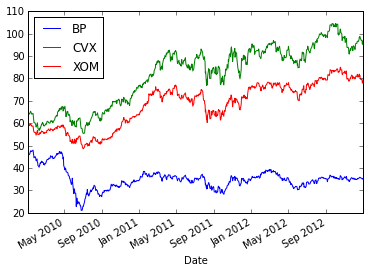

In [21]:
prices.plot()

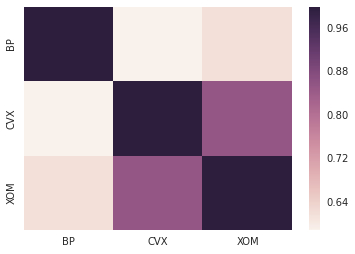

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#As expected pretty strong correlations with eachother
sns.heatmap(rets.corr())

#We'll learn much more about seaborn later!

# 查看两者的相关性： 一个变化，另一个同样变化的程度


In [23]:
# 图上可以看出CVX和XDM的相关性非常高，渠道0.8以上

C:\Users\Wen Weikun\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Wen Weikun\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


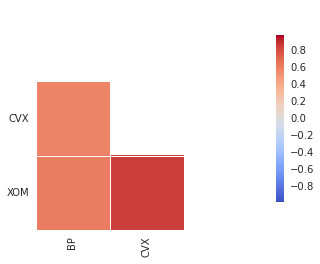

In [24]:
sns.corrplot(rets, annot=False, diag_names=False)

In [25]:
# We can also check for unique values and their counts 

#For example
ser1 = Series(['w','w','x', 'y', 'z' ,'w' ,'w' ,'x' ,'x' ,'y' ,'a' ,'z' ])

#Show
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     w
7     x
8     x
9     y
10    a
11    z
dtype: object

In [26]:
#Grab the unique values
ser1.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [27]:
#Now get the count of the unique values
ser1.value_counts()

w    4
x    3
z    2
y    2
a    1
dtype: int64

# Missing Data

In [28]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

In [29]:
#Now we'll learn how to deal with missing data, a very common task when analyzing datasets!

data = Series(['one','two', np.nan, 'four'])
data

0     one
1     two
2     NaN
3    four
dtype: object

In [30]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [31]:
#We can simply drop the NAN 
data.dropna()

0     one
1     two
3    four
dtype: object

In [32]:
# In a DataFrame we need to be a little more careful!

dframe = DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],[np.nan,np.nan,np.nan]])

In [33]:
dframe

,0,1,2
0,1,2,3
1,NaN,5,6
2,7,NaN,9
3,NaN,NaN,NaN


In [34]:
# df 使用dropna的时候要非常小心，会将所有包含na的行都删掉
clean_df = dframe.dropna()

In [35]:
clean_df

,0,1,2
0,1,2,3


In [36]:
# 我们可以指定只有整row都是na的时候才drop
dframe.dropna(how='all')

,0,1,2
0,1,2,3
1,NaN,5,6
2,7,NaN,9


In [37]:
#Or we can specify to drop columns with missing data
dframe.dropna(axis=1)

#This should drop all columns out since every column contains at least 1 NAN

""
0
1
2
3


In [38]:
#We can also threshold teh missing data as well

#For example if we only want rows with at least 3 data points
dframe2 = DataFrame([[1,2,3,np.nan],[2,np.nan,5,6],[np.nan,7,np.nan,9],[1,np.nan,np.nan,np.nan]])

#Show
dframe2

,0,1,2,3
0,1,2,3,NaN
1,2,NaN,5,6
2,NaN,7,NaN,9
3,1,NaN,NaN,NaN


In [40]:
# 这里我们可以要求每一行的数据至少有两个数值
#Droppin any rows tht dont have at least 2 data points
dframe2.dropna(thresh=2)

,0,1,2,3
0,1,2,3,NaN
1,2,NaN,5,6
2,NaN,7,NaN,9


In [41]:
#We can also fill any NAN
dframe2.fillna(1)

,0,1,2,3
0,1,2,3,1
1,2,1,5,6
2,1,7,1,9
3,1,1,1,1


In [42]:
#Can also fill in diff values for diff columns
# 指定不同的列使用不同的值来填充
dframe2.fillna({0:0,1:1,2:2,3:3})

,0,1,2,3
0,1,2,3,3
1,2,1,5,6
2,0,7,2,9
3,1,1,2,3


In [43]:
# 注意，以上的操作都是不影响源df的
#Note that we still have access to the original dframe
dframe2

,0,1,2,3
0,1,2,3,NaN
1,2,NaN,5,6
2,NaN,7,NaN,9
3,1,NaN,NaN,NaN


In [44]:
# 如果要改变源df，可以直接使用inplace=True
dframe2.fillna(0,inplace=True)
dframe2

,0,1,2,3
0,1,2,3,0
1,2,0,5,6
2,0,7,0,9
3,1,0,0,0


# index hierarchy

In [45]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd

from numpy.random import randn

In [46]:
#Now we'll learn about Index Hierarchy

#pandas allows you to have multiple index levels, which is very clear with this example:

ser = Series(np.random.randn(6),index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])

In [47]:
ser
# 可以拥有多重index
# 可以称为inner或outter index

1  a    0.177389
   b   -2.535596
   c   -1.157193
2  a    0.010705
   b    0.745423
   c   -0.171803
dtype: float64

In [48]:
ser[1]

a    0.177389
b   -2.535596
c   -1.157193
dtype: float64

In [ ]:
# intrnal index 不能直接ser['a']这样
# 需要先指定外面的level

In [50]:
ser[: , 'a']

1    0.177389
2    0.010705
dtype: float64

In [51]:
# We can also create Data Frames from Series with multiple levels
# internal的index将会变成column
dframe = ser.unstack()

#Show
dframe

,a,b,c
1,0.177389,-2.535596,-1.157193
2,0.010705,0.745423,-0.171803


In [53]:
#Can also reverse
dframe.unstack()

a  1    0.177389
   2    0.010705
b  1   -2.535596
   2    0.745423
c  1   -1.157193
   2   -0.171803
dtype: float64

In [54]:
# We can also apply multiple level indexing to DataFrames
dframe2 = DataFrame(np.arange(16).reshape(4,4),
                    index=[['a','a','b','b'],[1,2,1,2]],
                    columns=[['NY','NY','LA','SF'],['cold','hot','hot','cold']])
                                                   
dframe2  

NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [55]:
# We can also give these index levels names

#Name the index levels
dframe2.index.names = ['INDEX_1','INDEX_2']

#Name the column levels
dframe2.columns.names = ['Cities','Temp']

dframe2

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [56]:
# We can also interchange level orders (note the axis=1 for columns)
dframe2.swaplevel('Cities','Temp',axis=1)

Temp            cold hot     cold
Cities            NY  NY  LA   SF
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [57]:
#We can also sort levels
dframe2.sortlevel(1)

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
b       1          8   9  10   11
a       2          4   5   6    7
b       2         12  13  14   15

In [58]:
#Note the change in sorting, now the Dframe index is sorted by the INDEX_2
#We can also perform operations on particular levels
dframe2.sum(level='Temp',axis=1)

Temp             cold  hot
INDEX_1 INDEX_2           
a       1           3    3
        2          11   11
b       1          19   19
        2          27   27